## Netflix visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("netflix_titles.csv")
# print(df.head(2))

## Movies_vs_TVShows

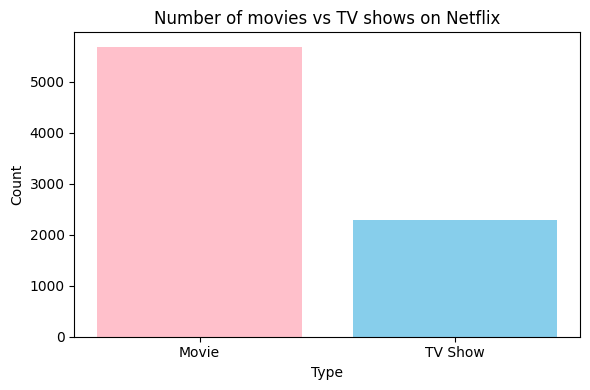

In [6]:
#clean data
df = df.dropna(subset=['type','release_year','rating','country','duration'])
type_count = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index, type_count.values, color=["pink","skyblue"])
plt.title("Number of movies vs TV shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movie_vs_Tvshows.png")
plt.show()


## Percentage of content rating 

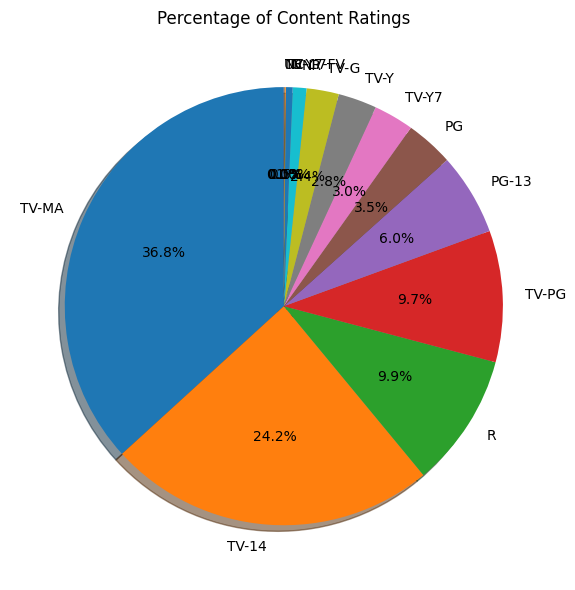

In [13]:
rating_counts = df["rating"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90,shadow=True)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('content_Rating_pie.png')
plt.show()

## Distribution of Movie Duration

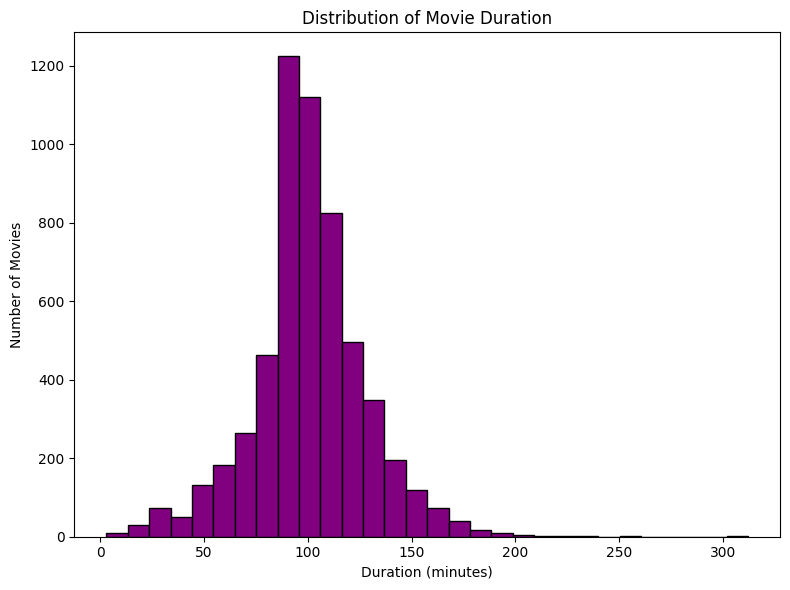

In [14]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_hist.png')
plt.show()

## Release Year Vs Number of Shows

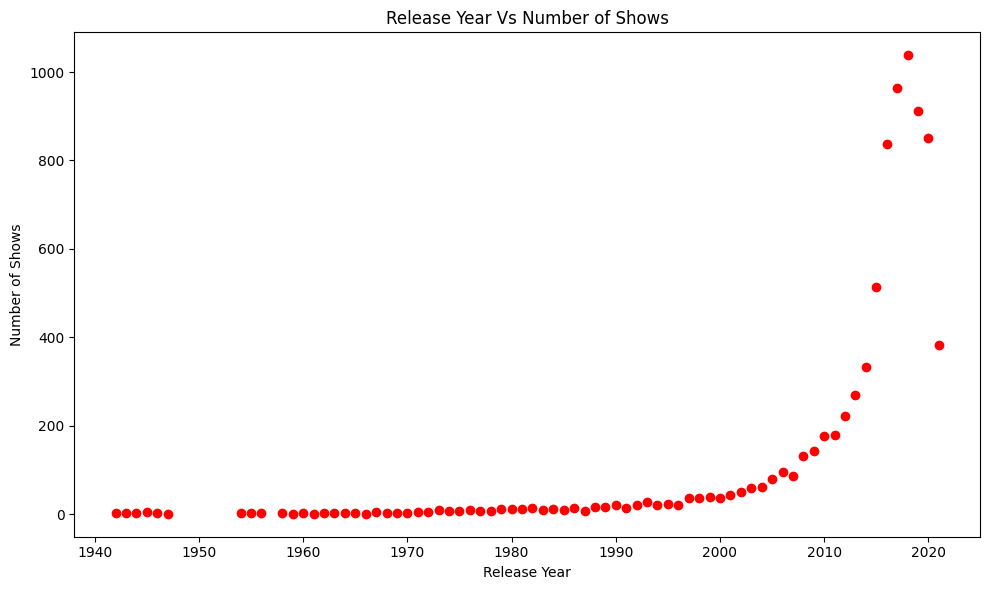

In [15]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year Vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

## Top 10 Countries by number of Shows

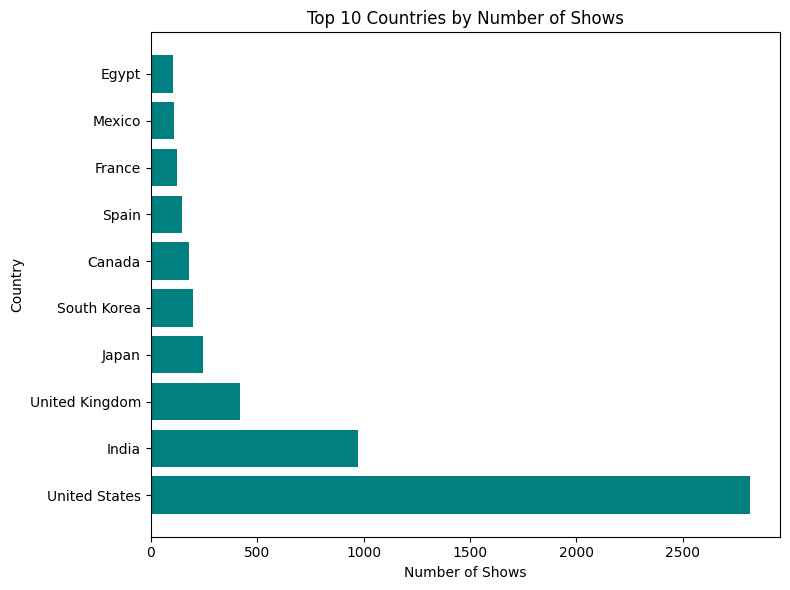

In [17]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()


## Comparison of Movies and TV Shows released over years

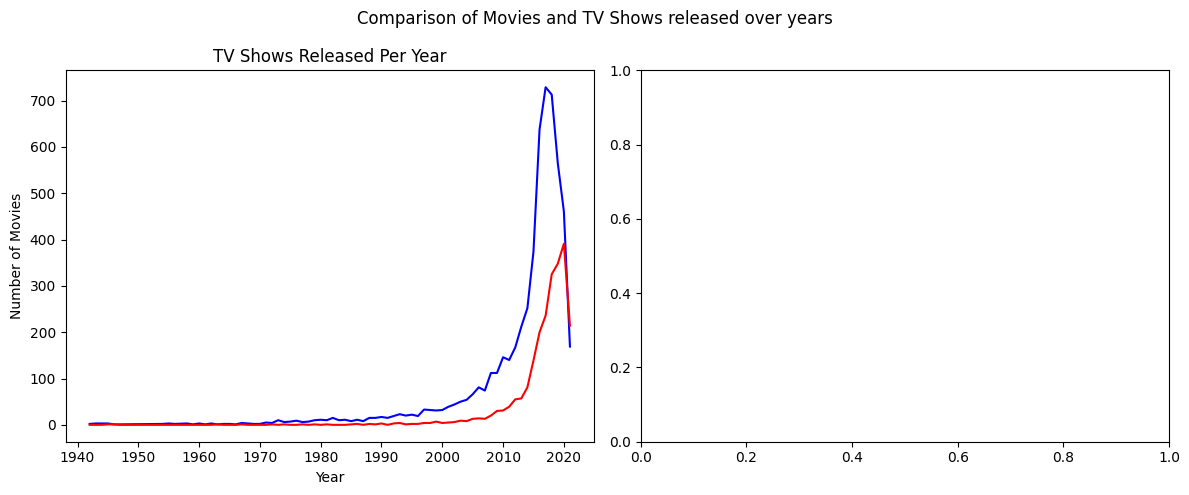

In [22]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12,5))

#first subplot:movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movie Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#Second subplot:TV Shows
ax[0].plot(content_by_year.index, content_by_year['TV Show'], color='red')
ax[0].set_title('TV Shows Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

fig.suptitle('Comparison of Movies and TV Shows released over years')

plt.tight_layout()
plt.savefig('movie_tv_shows_comparison.png')
plt.show()